# TensorFlow Version Check

In [1]:
import tensorflow as tf
print(tf.__version__)

1.13.1


# TensorFlow

```
TensorFlow Structure:
                tensor: Data
                op(operation): all the operation defined by tensorflow api such as tf.add, tf.constant 
                graphs: A graph includes tensor and op, represented as a dataflow graph
                session: An operator all the tensorflow stuff needs to run inside session
```

---


## Graph in TensorFlow

A `Graph` contains a set of `tf.Operation` objects, which represent units of computation; and `tf.Tensor` objects, which represent the units of data that flow between operations. **A `default graph` has already registered when we start coding.**


---


### How to Get a Graph:

**1. tf.get_default_graph()**

``` python
import tensorflow as tf

# get the default graph, just like assign an memory address to the graph
graph = tf.get_default_graph()
print(graph)
```

Output
```
<tensorflow.python.framework.ops.Graph object at 0x000001D46D1AA400>
```

**2. op, sess, or tensor's graph property**

```python
import tensorflow as tf

a = tf.constant(3.0)
b = tf.constant(6.0)

with tf.Session() as sess:
    print(a.graph)
    print(b.graph)
    print(sess.graph)
```

Output
```
<tensorflow.python.framework.ops.Graph object at 0x000001D46D1AA400>
<tensorflow.python.framework.ops.Graph object at 0x000001D46D1AA400>
<tensorflow.python.framework.ops.Graph object at 0x000001D46D1AA400>
```

---

### How to Create a Graph:
When creating a new graph, the new graph will be assign to a `new memory address`, which means the `new graph` and the `old graphs` will not be influenced by each other.

```python
import tensorflow as tf

a = tf.constant(3.0)
b = tf.constant(6.0)

graph = tf.Graph() # Create a new graph
print('New Graph: ', graph)

with graph.as_default():
    c = tf.constant(11.0)
    print('New Graph: ', c.graph) # new graph
    
    print('Old Graph: ', a.graph) # old graph
    print('Old Graph: ', b.graph) # old graph
```

Output
```
New Graph:  <tensorflow.python.framework.ops.Graph object at 0x000001D420EE2470>
New Graph:  <tensorflow.python.framework.ops.Graph object at 0x000001D420EE2470>
Old Graph:  <tensorflow.python.framework.ops.Graph object at 0x000001D46D1AA400>
Old Graph:  <tensorflow.python.framework.ops.Graph object at 0x000001D46D1AA400>
```

---


## Session in TensorFlow

Session in TensorFlow has three major functionalities:
1. Run graph(In one Session only can run one graph)
2. Calculation of Resource Allocation
3. Control Resources (Variable Resources, Queues, Threads)



## Static Shape vs. Dynamic Shape

`Static shape`: Once the tensor is fixed,  can't set the static shape again. Also, it cannot be modified across dimensions.(1D-> 1D, 2D->2D).

>Example:
```python
ph = tf.placeholder(tf.float32,[None,2]) # None represents not defined yet
ph.set_shape([3,2]) # set the shape, can't modify again
print(ph)
```
>Output:
```
Tensor("Placeholder_13:0", shape=(3, 2), dtype=float32)
```

`Dynamic shape`: Dynamic shape can create a new Tensor, but `reshape need to mach the number of elements.`

>Example:
```python
ph = tf.placeholder(tf.float32,[3,2])
ph_reshape = tf.reshape(ph,[1,6])
print(ph_reshape)
```
>Output:
```
Tensor("Reshape_5:0", shape=(1, 6), dtype=float32)
```

---
### Why need Reshape

Because sometimes we the data what to use are not the ideal dimension. For example, if we want to use a `1D` data, but the data we have is a `2D` data, we need to `reshape` the data from `2D to 1D`, so that we can continue our works.

---
### Random Data
Normally, we often use random function such as `Math.random()`. The result is a uniformly distributed random number, which means it can simulate a equal probability situation. For example, roll a dice, the probability of getting points should be equal. However, in real life, in real life, more random phenomena are consistent with the normal distribution. For example, people's height, normally tall people and short people will be rare, more will be on the average height.

>Method:
```tf.random_normal(['shape', 'mean=0.0', 'stddev=1.0', 'dtype=tf.float32', 'seed=None', 'name=None'])```

# tf.constant()

An operation in tensorflow:

For example:

```python
# Constant 1-D Tensor populated with value list.
tensor = tf.constant([1, 2, 3, 4, 5, 6, 7]) => [1 2 3 4 5 6 7]

# Constant 2-D tensor populated with scalar value -1.
tensor = tf.constant(-1.0, shape=[2, 3]) => [[-1. -1. -1.]
                                             [-1. -1. -1.]]
```

# tf.Variable()

1. `tf.Variable` is an operation in tensorflow. it can be persistent saved.
2. `tf.Variable` must be initialized before calling in session by using `tf.global_variables_initializer()`.
3. `tf.Variable` is often used for trainable variables such as `weights (W)` and `biases (B)` for the model.

For example

```python
data1 = tf.constant(6) # data1 is a constant op
data2 = tf.Variable(2) # data2 is a Variable op

addition = tf.add(data1,data2) # addition op
data_copy = tf.assign(data2,addition) # addition -> data2 data2 = addition
subtract = tf.subtract(data1,data2) # subtract op
multiply = tf.multiply(data1,data2) # multiply op
division = tf.divide(data1,data2) # division op
init = tf.global_variables_initializer() # for initialize variable op

with tf.Session() as sess:
    sess.run(init)
    sess.run(init)
    print('addition: ', sess.run(addition))
    print('subtract: ', sess.run(subtract))
    print('multiply: ', sess.run(multiply))
    print('division: ', sess.run(division))
    print('sess.run(data_copy) ', sess.run(data_copy)) # datacopy = 2+6 =8 , data2 = 8
    print('data_copy.eval() ',data_copy.eval())# datacopy = 6+8=14, data2 = 14   
    print('tf.get_default_sesson()', tf.get_default_session().run(data_copy)) #datacopy = 6+14=20, data2 = 20
```

Output:
```
addition:  8
subtract:  4
multiply:  12
division:  3.0
sess.run(data_copy)  8
data_copy.eval()  14
tf.get_default_sesson() 20
```

# tensorflor.placeholder 的运用

```
placeholder is initially empty and are used to feed in the actual training examples.
need a declared expect data type  with an optional shape argument

tf.placeholder is used to feed actual training examples.
```

For example:

```python
data1 = tf.placeholder(tf.float32) # a placeholder for a tensor(data) that will be always feed.
data2 = tf.placeholder(tf.float32)
addition= tf.add(data1,data2)

with tf.Session() as sess:
    print(sess.run(addition,feed_dict={data1:6,data2:2}))
```


8.0
end!


# Tensorflow 矩阵运算

In [13]:

import tensorflow as tf

data1 = tf.constant([[6,6]])
print('data1.shape: ',data1.shape)
data2 = tf.constant([[2],[1]]) # (2,1)
data3 = tf.constant([[3,3]]) #(1,2)
data4 = tf.constant([[1,2],[3,4],[5,6]]) #(3,2)

matMul = tf.matmul(data1,data2)
matMul2 = tf.multiply(data1,data2)
matAdd = tf.add(data1,data3)
with tf.Session() as sess:
    print('data1 * data2:\n',sess.run(matMul))
    print('data1 + data3:\n', sess.run(matAdd))
    print('data1 x data2:\n',sess.run(matMul2)) 
    


data1.shape:  (1, 2)
data1 * data2:
 [[18]]
data1 + data3:
 [[9 9]]
data1 x data2:
 [[12 12]
 [ 6  6]]
[[12 12]
 [ 6  6]]


# Tensorflow特殊矩阵

In [37]:
import tensorflow as tf
mat0 = tf.zeros([2,3])# 零矩阵
mat1 = tf.ones([3,2])# 单位矩阵
mat_fill = tf.fill([2,3],15) #填充矩阵
with tf.Session() as sess:
    print(sess.run(mat0))
    print(sess.run(mat1))
    print(sess.run(mat_fill))
    
    

[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1.]
 [1. 1.]
 [1. 1.]]
[[15 15 15]
 [15 15 15]]


In [16]:
import tensorflow as tf
matA = tf.constant([[2],[3],[4]])
matB = tf.zeros_like(matA) #复制一个同样维度的零矩阵
matC = tf.linspace(0.0,2.0,11)
matD = tf.random_uniform([2,3],-1,2)# 2x3 的随机矩阵,随机范围是(-1,2)
with tf.Session() as sess:
    #print(sess.run(matA))
    print("matB: \n",sess.run(matB))
    print("matC: \n",sess.run(matC))
    print("matD: \n",sess.run(matD))
    
    

matB: 
 [[0]
 [0]
 [0]]
matC: 
 [0.        0.2       0.4       0.6       0.8       1.        1.2
 1.4       1.6       1.8000001 2.       ]
matD: 
 [[-0.4354236   1.1412733  -0.238724  ]
 [ 0.64117324 -0.32113397  1.0433965 ]]


# Initialization of Weights Options

1. Xavier(Glorot) Initialization
    ```Uniform/Normal```
2. Draw weights from a distribution with zero mean and a specific variance.

$$Var(W) = \frac{1}{n_in}$$

# Linear Regression

w1x1+w2x2+w3x3+...w_nx_n + bias

1. Prepare a feature and a target value `y = 0.7*x + 0.8`
2. create model, randomly initialize and prepare a weight and a bias `y_predict = wx+b`
3. error function: $\frac{(y_1-y_{1p})^2 +...+(y_n - {y_np})}{n}$
4. graident descent for optimize the process, assign learning rate

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

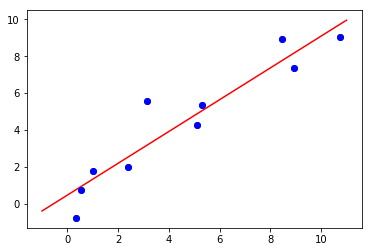

In [18]:

# Prepare data x and y (here used random data)
x_data = np.linspace(0,10,10)+np.random.uniform(-1.5,1.5,10) # 10 element range(-1.5,1.5)
y_data = np.linspace(0,10,10)+np.random.uniform(-1.5,1.5,10) # 10 element range(-1.5,1.5)

# plot the data
plt.plot(x_data,y_data,'o')

#give random weight and bias for linear regression model y = wx+b
w = tf.Variable(np.random.rand(1),name='w')
b = tf.Variable(np.random.rand(1),name='b')
init  = tf.global_variables_initializer()

# create error function
error = 0
for x,y in zip(x_data,y_data):
    y_pred = w*x+b
    error+=(y-y_pred)**2

# train data by using GradientDecentOptimizer()
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

# Session()
with tf.Session() as sess:
    sess.run(init) # initialize Variable op
    training_steps = 1000 # how many times to train
    
    # create event file for showing up in tensorboard
    filewriter = tf.summary.FileWriter('./',graph = sess.graph)
    
    for i in range(training_steps):
        sess.run(train)
    final_w, final_b = sess.run([w,b])

x_test = np.linspace(-1,11,10)
# y = mx+b
y_pred_plot = final_w * x_test + final_b
plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_data,'ob')



# TensorFlow:Save and Load the Model

**Saving Example:**

```python
...
# Create a new instance of Saver in TensorFlow
saver = tf.train.Saver() 

# Create a session and run
with tf.Session() as sess:
    sess.run(init)
    epochs = 100
    for i in range(epochs):
        sess.run(train)    
    # save 
    saver.save(sess,'./savedModel.ckpt')
```

**Loading Example:**

```python
# Create a saver.
saver = tf.train.Saver()
saver.restore(sess,'./savedModel.ckpt')
```

# Tensorflow Regression Example

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

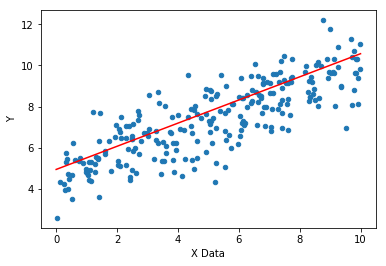

In [7]:
x_data = np.linspace(0.0,10.0,1000000)
noise = np.random.randn(len(x_data)) # random add some noise to make data not straight

# y = mx+b
# b = 5
y_true = (0.5 * x_data)+ 5 +noise

x_df = pd.DataFrame(data=x_data, columns = ['X Data'])
y_df = pd.DataFrame(data=y_true, columns = ['Y'])

pd.DataFrame()
my_data = pd.concat([x_df,y_df],axis = 1)  # (axis= 0 ==> concat Row) (axis= 1 ==> concat Column)
my_data.sample(n=250).plot(kind='scatter',x='X Data',y = 'Y')# 250 random samples

batch_size = 8


# tf.Variable is often for trainable variables such as weights (W) and biases (B) for your model.
# Two Random Numbers
m = tf.Variable(.81) # slope that wants to adjust
b = tf.Variable(.17) # offset that wants to adjust

init = tf.global_variables_initializer()# variable needs to be initialized by this function

# tf.placeholder is used to feed actual training examples.
# x y placeholder
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

y_model = m * xph + b
error = tf.reduce_sum(tf.square(yph-y_model)) #loss function

#GradientDescentOptimizer (training function)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

# run session
with tf.Session() as sess:
    sess.run(init)
    bactches = 1000 # train 1000 times
    
    for i in range(bactches):
        rand_index = np.random.randint(len(x_data),size = batch_size)
        feed = {xph:x_data[rand_index],yph:y_true[rand_index]}
        
        # feed_dict is for updating the placeholder's value
        sess.run(train,feed_dict=feed)
    pred_m, pred_b = sess.run([m,b])

y_pred = x_data*pred_m+pred_b
plt.plot(x_data,y_pred,'r');


# Tensorflow Regression by using Estimator API

In [8]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Suzuka\\AppData\\Local\\Temp\\tmp18w4kzgo', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001504891EB70>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create Check

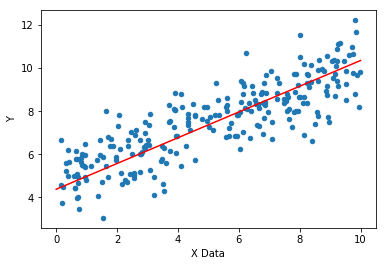

In [10]:
x_data = np.linspace(0.0,10.0,1000000)
noise = np.random.randn(len(x_data)) # random add some noise to make data not straight
# y = mx+b
# b = 5
y_true = (0.5 * x_data)+ 5 +noise

x_df = pd.DataFrame(data=x_data, columns = ['X Data'])
y_df = pd.DataFrame(data=y_true, columns = ['Y'])

pd.DataFrame()
my_data = pd.concat([x_df,y_df],axis = 1)  # (axis= 0 ==> concat Row) (axis= 1 ==> concat Column)
my_data.sample(n=250).plot(kind='scatter',x='X Data',y = 'Y')# 250 random samples

feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

x_train,x_eval,y_train,y_eval = train_test_split(x_data,y_true,test_size=0.3,random_state=101)

input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, batch_size=8, num_epochs=None, shuffle=True)

train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, batch_size=8, num_epochs=1000, shuffle=False)

eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval}, y_eval, batch_size=8, num_epochs=1000, shuffle=False)

estimator.train(input_fn=input_func,steps=1000)

train_metrics = estimator.evaluate(input_fn = train_input_func,steps=1000)
eval_metrics = estimator.evaluate(input_fn = eval_input_func,steps=1000)

new_data = np.linspace(0,10,10)
pred_input_fn = tf.estimator.inputs.numpy_input_fn({'x':new_data},shuffle=False)
pred_dict = list(estimator.predict(input_fn=pred_input_fn))

predictions = []
for pred in pred_dict:
    predictions.append(pred['predictions'])

plt.plot(new_data,predictions,'r')

# TensorFlow Classification Example

In [71]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [72]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [48]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [49]:
# prepare for normalize 
cols_to_norm = ['Number_pregnant','Glucose_concentration','Blood_pressure','Triceps', 'Insulin', 'BMI','Pedigree']

# normalize data through pandas
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [79]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
gluc_concentration = tf.feature_column.numeric_column('Glucose_concentration')
blood_pressure = tf.feature_column.numeric_column('Blood_pressure')
triceps = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [80]:
# provide group categories manually
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

#Or
# auto fill the categroies by using hash_bucket the max size is 10, here it has 4 groups, so it is fine
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

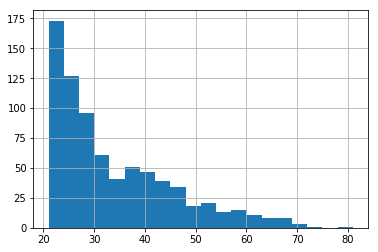

In [81]:
diabetes['Age'].hist(bins=20)

In [82]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [84]:
feat_cols = [num_preg,gluc_concentration,blood_pressure,triceps,insulin,bmi,pedigree,age]

In [85]:
# Train test split
x_data = diabetes.drop('Class',axis = 1) # drop class column
labels = diabetes['Class']

In [86]:
X_train,X_test,y_train,y_test = train_test_split(x_data,labels,test_size = 0.3, random_state=101)

input_func = tf.estimator.inputs.pandas_input_fn(x = X_train, y = y_train, batch_size=10,num_epochs=1000,shuffle=True)

model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Suzuka\\AppData\\Local\\Temp\\tmprmxi5ba6', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001FDC16B9C88>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [87]:
# train the model
model.train(input_fn = input_func,steps = 1000 )

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Suzuka\AppData\Local\Temp\tmprmxi5ba6\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 486.787
INFO:tensorflow:loss = 7.7633505, step = 101 (0.206 sec)
INFO:tensorflow:global_step/sec: 895.249
INFO:tensorflow:loss = 8.326035, step = 201 (0.113 sec)
INFO:tensorflow:global_step/sec: 919.6
INFO:tensorflow:loss = 7.9136724, step = 301 (0.108 sec)
INFO:tensorflow:global_step/sec: 857.224
INFO:tensorflow:loss = 6.198177, step = 401 (0.118 sec)
INFO:tensorflow:global_step/sec: 856.795
INFO:tensorflow:loss = 6.8137465, step = 501 (0.117 sec)
INFO:tensorflow:global_step/sec: 871.797
INFO:t

In [102]:
eval_input_func= tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)
results = model.evaluate(eval_input_func)
print(results)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-11T06:20:03Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Suzuka\AppData\Local\Temp\tmprmxi5ba6\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-11-06:20:04
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.72727275, accuracy_baseline = 0.64935064, auc = 0.7626749, auc_precision_recall = 0.6024054, average_loss = 0.58172417, global_step = 1000, label/mean = 0.35064936, loss = 5.599095, precision = 0.6551724, prediction/mean = 0.41112676, recall = 0.4691358
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\Suzuka\AppData\Local\Temp\tmprmxi5ba6\model.ckpt-1000
{'accuracy': 0.72727275, 'accuracy_baseline': 0.64935064, 'auc': 0.7626749, 'auc_precision_recall': 0.6024054, 'average_loss': 0.581

In [94]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)
predictions = model.predict(pred_input_func)

my_pred = list(predictions)
print(my_pred)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Suzuka\AppData\Local\Temp\tmprmxi5ba6\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[{'logits': array([-0.59221375], dtype=float32), 'logistic': array([0.35612708], dtype=float32), 'probabilities': array([0.6438729 , 0.35612705], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0'], dtype=object)}, {'logits': array([0.03380275], dtype=float32), 'logistic': array([0.50844985], dtype=float32), 'probabilities': array([0.4915501 , 0.50844985], dtype=float32), 'class_ids': array([1], dtype=int64), 'classes': array([b'1'], dtype=object)}, {'logits': array([-0.42814505], dtype=float32), 'logistic': array([0.39456937], dtype=float32), 'probabilities': array([0.6054306 , 0.39456934], dtype=float32), 'class_ids': array([0], dtype=int64), 'classes': array([b'0']

In [103]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,20,20,20,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Suzuka\\AppData\\Local\\Temp\\tmpg3rq5z1g', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001FDC767AB38>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [104]:
dnn_model.train(input_fn=input_func,steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Suzuka\AppData\Local\Temp\tmpg3rq5z1g\model.ckpt.
INFO:tensorflow:loss = 7.537437, step = 1
INFO:tensorflow:global_step/sec: 527.723
INFO:tensorflow:loss = 5.5419188, step = 101 (0.192 sec)
INFO:tensorflow:global_step/sec: 835.554
INFO:tensorflow:loss = 5.8428555, step = 201 (0.122 sec)
INFO:tensorflow:global_step/sec: 821.868
INFO:tensorflow:loss = 5.511993, step = 301 (0.120 sec)
INFO:tensorflow:global_step/sec: 815.175
INFO:tensorflow:loss = 4.2281647, step = 401 (0.124 sec)
INFO:tensorflow:global_step/sec: 828.432
INFO:tensorflow:loss = 3.4716806, step = 501 (0.120 sec)
INFO:tensorflow:global_step/sec: 864.621
INFO:tensorflow:loss = 6.911633, step = 601 (0.119 sec)
INFO:tensorflow:global_step/se

In [105]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test,y=y_test,batch_size=10, num_epochs = 1,shuffle=False)
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-03-11T06:20:21Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Suzuka\AppData\Local\Temp\tmpg3rq5z1g\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-03-11-06:20:21
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.65367967, accuracy_baseline = 0.64935064, auc = 0.69855964, auc_precision_recall = 0.49677598, average_loss = 0.61085343, global_step = 1000, label/mean = 0.35064936, loss = 5.8794646, precision = 0.6, prediction/mean = 0.28677246, recall = 0.037037037
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\Suzuka\AppData\Local\Temp\tmpg3rq5z1g\model.ckpt-1000


{'accuracy': 0.65367967,
 'accuracy_baseline': 0.64935064,
 'auc': 0.69855964,
 'auc_precision_recall': 0.49677598,
 'average_loss': 0.61085343,
 'label/mean': 0.35064936,
 'loss': 5.8794646,
 'precision': 0.6,
 'prediction/mean': 0.28677246,
 'recall': 0.037037037,
 'global_step': 1000}